# Inflation Impact Analysis

Inflation is the rate at which the general level of prices for goods and services rises over time, which leads to a decrease in the purchasing power of money. It indicates how much more expensive a set of goods and services has become over a certain period.

## Overview
Inflation occurs when there is a sustained increase in the general price level of goods and services in an economy over time. It impacts various aspects of the economy, including purchasing power, consumer behaviour, savings, and investment. Moderate inflation is typically a sign of a healthy, growing economy, as it encourages spending and investment. However, high or unpredictable inflation can erode the value of money, disrupt financial planning, and lead to economic uncertainty.

To analyze the impact of inflation, we need to compare it with other economic indicators. So, to analyze the impact of inflation on the economy, we will compare it with the exchange rates over time. This comparison is important because exchange rates are influenced by inflation differentials between countries, such that higher inflation in a country generally leads to a weaker currency relative to countries with lower inflation.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore') 

In [3]:
inflation_data = pd.read_csv('Inflation_Rates_Transformed-1.csv')
exchange_rate_data = pd.read_csv('USD_INR_Exchange_Rates_1980_2024.csv')

inflation_data.head()

,Country,Year,Inflation Rate
0,India,1980,11.3
1,United States,1980,13.5
2,Emerging market and developing economies,1980,26.0
3,India,1981,12.7
4,United States,1981,10.4


In [4]:
exchange_rate_data.head()

,Year,Average Exchange Rate (INR/USD)
0,2003,45.476087
1,2004,45.188604
2,2005,44.003753
3,2006,45.183561
4,2007,41.192248


In [9]:
# filter the inflation data for India and the United States
inflation_filtered_df = inflation_data[inflation_data['Country'].isin(['India', 'United States'])]

# pivot the inflation data to have separate columns for India and the United States inflation rates
inflation_pivot_df = inflation_filtered_df.pivot(index='Year', columns='Country', values='Inflation Rate').reset_index()

# merge the exchange rates data with the inflation data
merged_df = pd.merge(exchange_rate_data, inflation_pivot_df, on='Year')

# renaming columns
merged_df.columns = ['Year', 'Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']

merged_df.head()

,Year,Exchange Rate (INR/USD),Inflation Rate (India),Inflation Rate (United States)
0,2003,45.476087,4.1,2.3
1,2004,45.188604,4.0,2.7
2,2005,44.003753,3.7,3.4
3,2006,45.183561,6.7,3.2
4,2007,41.192248,5.9,2.9


The merged dataset now contains the following columns for each year:

* **Exchange Rate (INR/USD)**: The average exchange rate of INR to USD.
* **Inflation Rate (India)**: The inflation rate for India.
* **Inflation Rate (United States)**: The inflation rate for the United States.

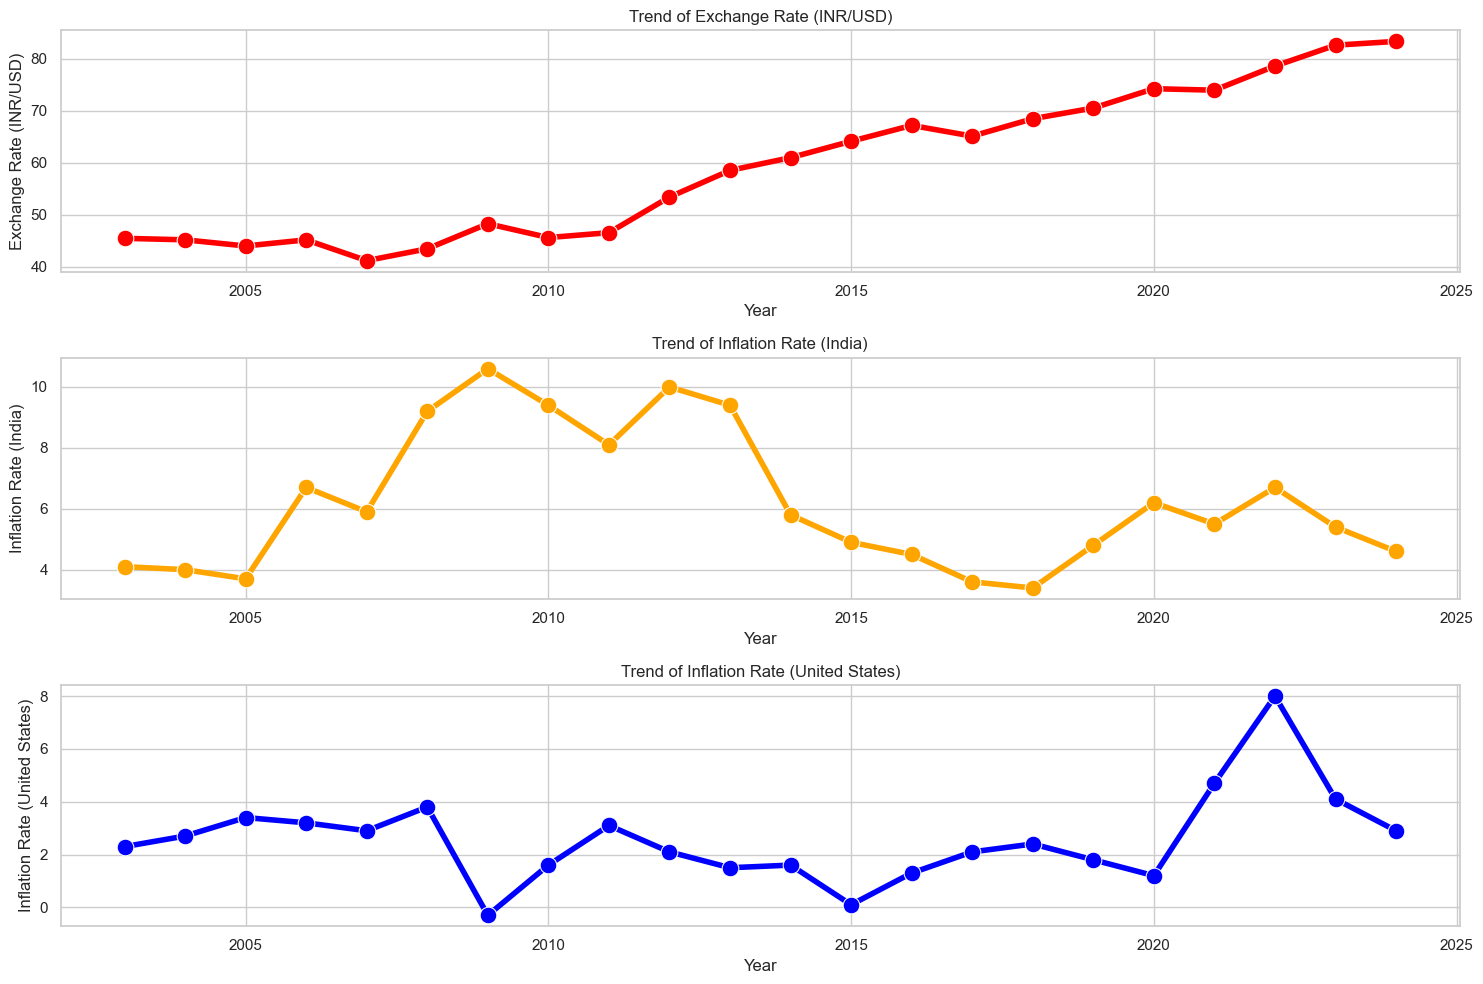

In [15]:
# creating scatter plots for various features vs. popularity
features = ['Exchange Rate (INR/USD)', 'Inflation Rate (India)', 'Inflation Rate (United States)']
color = ['red', 'orange', 'blue']
plt.figure(figsize=(15, 10))

for i, (feature, color) in enumerate(zip(features, color), 1):
    plt.subplot(3, 1, i)
    sns.lineplot(x=merged_df['Year'], y=merged_df[feature], 
                 color=color, marker='o', linewidth=4, markersize=12)
    plt.title(f'Trend of {feature}')
    plt.ylabel(feature)
    plt.xlabel('Year')

plt.tight_layout()
plt.show()

The exchange rate shows a general upward trend over the years, which indicates a depreciation of the Indian Rupee against the US Dollar. However, there are periods of both sharp increases and relative stability.

India’s inflation rate has fluctuated significantly over the years, with periods of high inflation (e.g., early 2000s) and more stable inflation in recent years. The United States has generally experienced lower and more stable inflation rates compared to India, with fewer extreme fluctuations.

Next, let’s perform a correlation analysis to explore the relationship between the inflation rates and the exchange rates:

In [ ]:
correlation_matrix = merged_df[['Exchange Rate (INR/USD)',
                                'Inflation Rate (India)',
                                'Inflation Rate (United States)']].corr()

correlation_matrix

Findings from the correlation analysis:

* **Exchange Rate vs. Inflation Rate (India)**: The correlation coefficient is approximately **-0.34**, which indicates a weak negative relationship. It suggests that as inflation in India increases, the INR tends to depreciate against the USD, though the relationship is not very strong.
* **Exchange Rate vs. Inflation Rate (United States)**: The correlation coefficient is approximately **0.24**, which indicates a weak positive relationship. It suggests that higher inflation in the United States might be associated with a depreciation of the USD against the INR, but again, the relationship is not strong.
* **Inflation Rate (India) vs. Inflation Rate (United States)**: The correlation between the inflation rates of India and the United States is very weak and negative **(-0.12)**, which indicates that the inflation rates in these two countries do not move together.

Next, we’ll perform a comparative analysis to highlight periods of significant divergence or convergence between the inflation rates and the exchange rates:

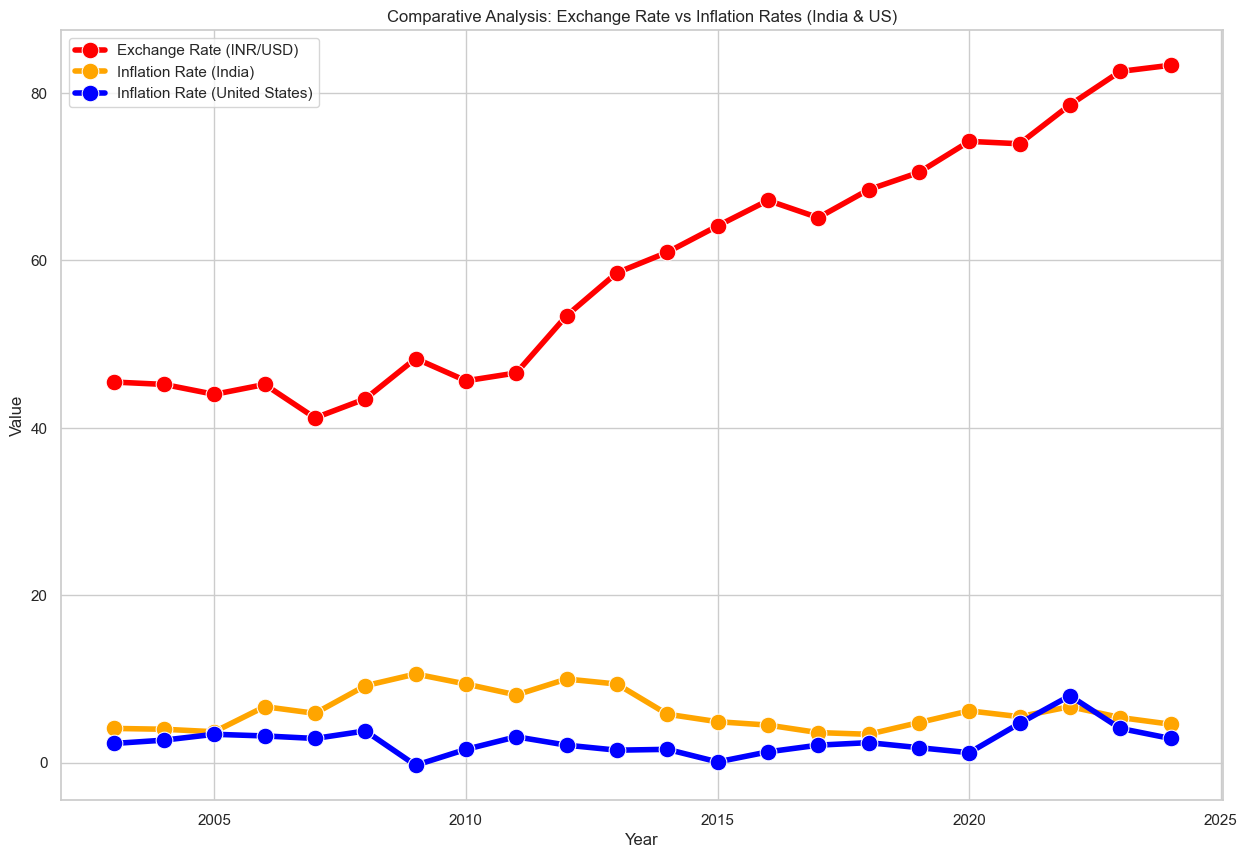

In [25]:
plt.figure(figsize=(15,10))

sns.lineplot(x=merged_df['Year'], y=merged_df['Exchange Rate (INR/USD)'], 
             color='red', marker='o', linewidth=4, markersize=12,
             label='Exchange Rate (INR/USD)')

sns.lineplot(x=merged_df['Year'], y=merged_df['Inflation Rate (India)'], 
             color='orange', marker='o', linewidth=4, markersize=12, 
             label='Inflation Rate (India)')

sns.lineplot(x=merged_df['Year'], y=merged_df['Inflation Rate (United States)'], 
             color='blue', marker='o', linewidth=4, markersize=12, 
             label='Inflation Rate (United States)')
plt.title(f'Comparative Analysis: Exchange Rate vs Inflation Rates (India & US)')
plt.ylabel('Value')
plt.xlabel('Year')

plt.show()



Findings from the comparative analysis:

* **Early 2000s**: A period of high inflation in India coincides with a period of relative stability in the exchange rate. It suggests that factors other than inflation may have been driving the exchange rate during this time.
* **Late 2000s to Early 2010s**: The period shows some alignment between rising inflation in India and a weakening INR, which indicates that inflation could be contributing to exchange rate movements.
* **2015 Onwards**: The exchange rate continues to rise, while both India’s and the United States’ inflation rates remain relatively low. This divergence suggests that the exchange rate is influenced by additional factors beyond inflation, such as economic growth, monetary policy, and international trade dynamics.

### Analyzing Inflation based on the Purchasing Power Parity (PPP)
Purchasing Power Parity (PPP) is an economic theory that suggests that in the long term, exchange rates between two countries should adjust so that a basket of goods costs the same in both countries when priced in a common currency. PPP is used as a method to compare the economic productivity and standards of living between different countries. If one country’s inflation rate is higher than another’s, its currency should depreciate accordingly to maintain parity in purchasing power to ensure that the same goods cost the same in both locations.

We will now analyze whether the Purchasing Power Parity theory holds by comparing the relative inflation rates and exchange rate movements over time. It will provide a deeper understanding of whether the exchange rate aligns with the theoretical value based on inflation differentials.

To test whether PPP holds for India and the United States, we can:

1. Calculate the Expected Exchange Rate Based on PPP
2. Compare the Actual Exchange Rate with the PPP-Based Expected Exchange Rate

The formula for PPP-based exchange rate prediction is:

**Expected Exchange Rate = Initial Exchange Rate × ( 1 + Inflation Rate in India / 1 + Inflation Rate in the US)**

Let’s calculate and visualize the PPP-based expected exchange rate versus the actual exchange rate:

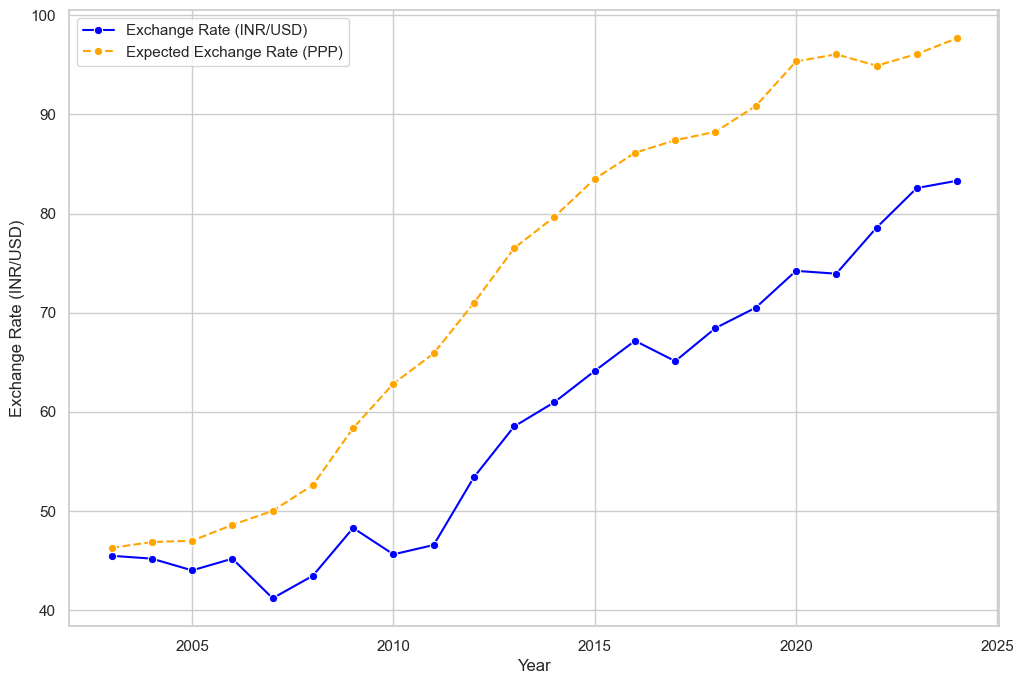

In [31]:
initial_exchange_rate = merged_df['Exchange Rate (INR/USD)'].iloc[0]

# calculate expected exchange rate based on PPP
merged_df['Expected Exchange Rate (PPP)'] = initial_exchange_rate * (
    (1 + merged_df['Inflation Rate (India)'] / 100) / (1 + merged_df['Inflation Rate (United States)'] / 100)
).cumprod()

plt.figure(figsize=(12,8))
sns.lineplot(x=merged_df['Year'], y=merged_df['Exchange Rate (INR/USD)'],
            color='blue', marker='o', label='Exchange Rate (INR/USD)')

sns.lineplot(x=merged_df['Year'], y=merged_df['Expected Exchange Rate (PPP)'],
            color='orange', marker='o', linestyle='--', label='Expected Exchange Rate (PPP)')

plt.show()

The blue line represents the actual exchange rate (INR/USD) over time, while the orange dashed line represents the expected exchange rate based on PPP. In some periods, the actual exchange rate closely follows the expected PPP-based rate, which suggests that PPP holds. However, in other periods, there are significant deviations between the two.

The PPP-based expected exchange rate shows a more rapid increase compared to the actual exchange rate. It suggests that, according to PPP, the INR should have depreciated more than it actually did. However, the actual exchange rate was consistently lower than the PPP-based expected rate, which indicates that factors other than inflation are at play.

### Conclusion
Our analysis revealed that inflation in India and the United States influences the exchange rate between INR and USD. Higher inflation in India generally leads to a depreciation of the INR relative to the USD, while lower inflation in the United States contributes to a stronger USD. While inflation affects the exchange rate between INR and USD, it is only one of many factors.